# Stationarity in Time Series Analysis

### 28th December 2021 created by Yan Ge

In this Notebook, we will focus on:1) Time-series data transformation to stationarity; 2) Graph data exploration; 3) Stationarity in PageRank

Sources of this tutorial: 1). https://en.wikipedia.org/wiki/PageRank; 2) https://networkx.org/

### Time-series data transformation to stationarity

You can achieve stationarity when you remove trend and seasonality. Stationarity of a times series is when you have constant mean and variance. 

In [3]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime

In [4]:
df = pd.read_csv('data/AAPL.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)
df.head()

,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-30,135.580002,135.990005,133.399994,133.720001
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004


Differencing can help to reduce trend and seasonality. You can difference your data by subtraction. You subtract away the previous period from the current period. Below you will see that the first observation has a NaN because there was no previous period.

In [9]:
# Take first difference of close price
df['Close_diff'] = df['Close'].diff()

,Open,High,Low,Close,Close_diff
Date,,,,,
2020-12-29,138.050003,138.789993,134.339996,134.869995,-1.820007
2020-12-30,135.580002,135.990005,133.399994,133.720001,-1.149994
2020-12-31,134.080002,134.740005,131.720001,132.690002,-1.029999
2021-01-04,133.520004,133.610001,126.760002,129.410004,-3.279998
2021-01-05,128.889999,131.740005,128.429993,131.009995,1.599991


In [1]:
# Remove the first data point
df.dropna(inplace=True)

In [ ]:
# Take a look at the head of the dataset
df.head()

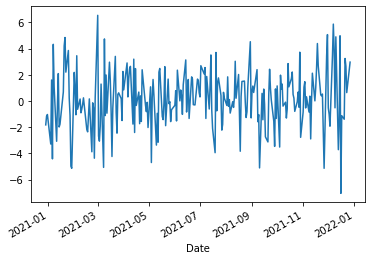

In [12]:
# Plot first difference of close price
df['Close_diff'].plot()

### Introduction to graph exploration with NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more. The Networkx tutorial is available here: https://networkx.org/documentation/stable/tutorial.html.

Create an empty graph with no nodes and no edges.

In [4]:
import networkx as nx
G = nx.Graph()

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). 

# Nodes

The graph `G` can be grown in several ways.  NetworkX includes many graph
generator functions and facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations. 

In [14]:
# You can add one node at a time
G.add_node(1)

In [15]:
# or add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list
G.add_nodes_from([2,3])

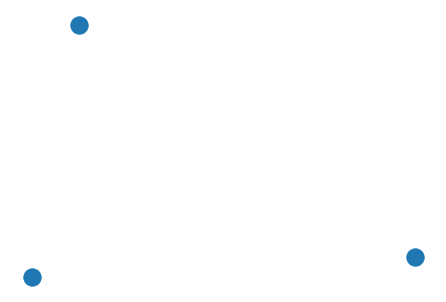

In [18]:
nx.draw(G)

Nodes from one graph can be incorporated into another:

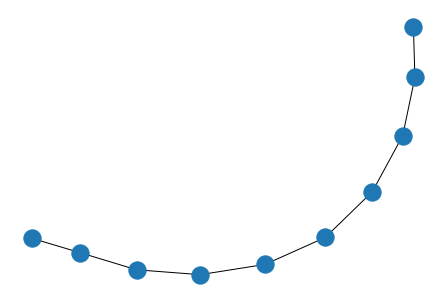

In [20]:
# creat a path graph H with 10 nodes linearly connected by 9 edges.
H = nx.path_graph(10)
nx.draw(H)

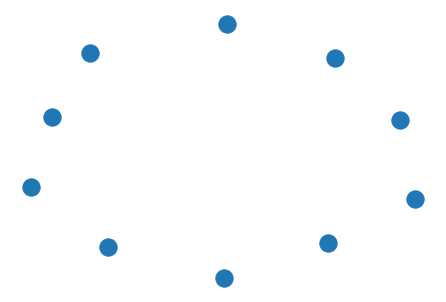

In [22]:
# add nodes from graph H to graph G
G.add_nodes_from(H)
nx.draw(G)

`G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

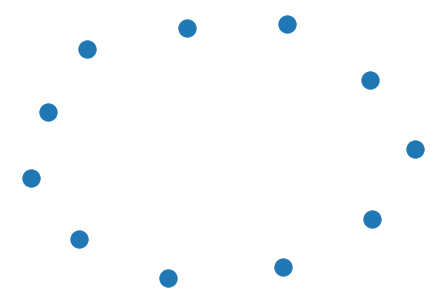

In [23]:
G.add_node(H)
nx.draw(G)

The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

# Edges

`G` can also be grown by adding one edge at a time,

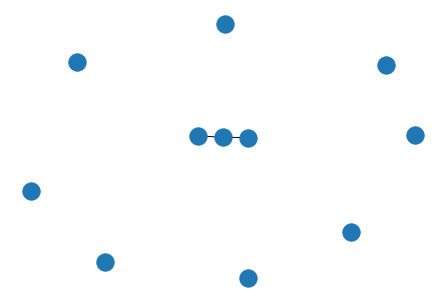

In [29]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

nx.draw(G)

EdgeView([(1, 2), (1, 3), (2, 3)])

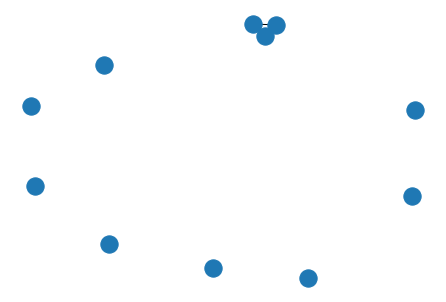

In [31]:
# Alternatively, you can add edges to the graph G from a list [(1, 2), (1, 3)]
G.add_edges_from([(1,2),(1,3)])
nx.draw(G)
G.edges

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further
below.

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7fd7f35e1e10>]
[(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


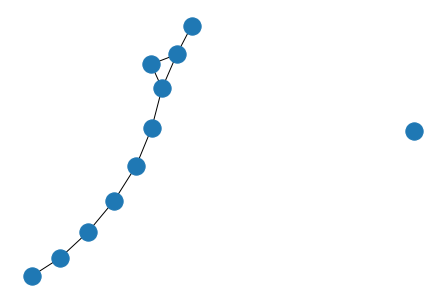

In [34]:
G.add_edges_from(H.edges)
nx.draw(G)
print(G.nodes)
print(G.edges)

In [37]:
# print how many nodes and edges in the graph G
print(len(G.nodes))
print(len(G.edges))

print(nx.info(G))

11
10
Name: 
Type: Graph
Number of nodes: 11
Number of edges: 10
Average degree:   1.8182


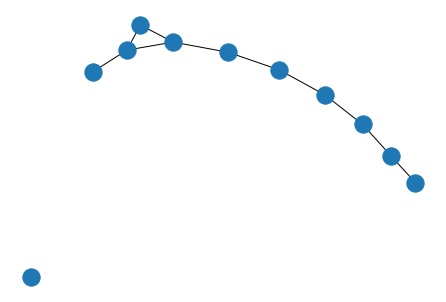

In [38]:
# Visualize the graph G
nx.draw(G)

# Case Study: Network of American football games

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

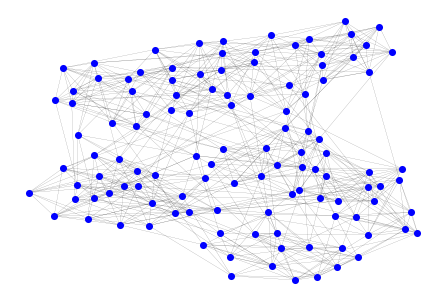

In [5]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {
    "node_color": "blue",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

# Stationarity in PageRank

In [6]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/f/fb/PageRanks-Example.svg')

First, we will encode the links present on this graph as a count matrix `M_counts`.

In [9]:
n_pages = 11 # numbering pages A through K as 0 to 10
M_counts = np.zeros((n_pages, n_pages)) # will hold the number of link counts (assumed 0 or 1)
# columns = starting page, row = destination page, ie M_ij = whether or not there is a link from j to i

M_counts[:,0] = 1 # page 0 (A in the graphic) is a sink because it has no outgoing links at all; 
# however, M cannot contain an all-zero column, so do as if A was linking to all other pages (ie put 1's everywhere)
M_counts[2,1] = 1 # B->C
M_counts[1,2] = 1 # C->B
M_counts[0,3] = 1 # D->A
M_counts[1,3] = 1 # D->B
M_counts[1,4] = 1 # E->B
M_counts[3,4] = 1 # E->D
M_counts[5,4] = 1 # E->F
M_counts[1,5] = 1 # F->B
M_counts[4,5] = 1 # F->E
M_counts[1,6] = 1 # G,H,I->B,E
M_counts[4,6] = 1
M_counts[1,7] = 1
M_counts[4,7] = 1
M_counts[1,8] = 1
M_counts[4,8] = 1
M_counts[4,9] = 1 # J,K->E
M_counts[4,10] = 1
print(M_counts)

[[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
# make an adjacency matrix M out of M_counts, by dividing each column by its sum, ie we are making sure columns sum to 1 :
M = np.zeros((n_pages, n_pages))

for i in range(n_pages):
    M[:,i] = M_counts[:,i] / np.sum(M_counts[:,i])

np.set_printoptions(precision=3)
print(M)

[[0.091 0.    0.    0.5   0.    0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    1.    0.5   0.333 0.5   0.5   0.5   0.5   0.    0.   ]
 [0.091 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.333 0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.    0.5   0.5   0.5   0.5   1.    1.   ]
 [0.091 0.    0.    0.    0.333 0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.091 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


In [26]:
import numpy
def check_M(M):
    """
    check that M has the right format to be used by pagerank function
    """
    n_pages = M.shape[0] # n_pages is the number of rows of M
    np.testing.assert_equal(M.shape[0], M.shape[1], err_msg = 'M should be square')
    np.testing.assert_array_almost_equal(M.sum(axis=0), np.ones((n_pages)), 
                                         err_msg = 'assert each column sums to one (M is assumed column-stochastic)')
    for j in range(n_pages):
        M_column = M[:,j]
        n_nonzero = np.count_nonzero(M[:,j])
        np.testing.assert_array_almost_equal(M_column[M_column.nonzero()], np.ones((n_nonzero)) / n_nonzero,
                                             err_msg = 'in column %g, all non-zero entries should be equal (and equal to 1 divided by their number)' % j)

check_M(M) # will produce error if M does not have the right format

In [40]:
import numpy as np
def pagerank(M, d=0.85, square_error=1e-6):
    """
    M : the adjacency matrix of the pages. It is assumed to be column-stochastic (ie column sum to 1); all links have equal weight.
    A page with no outgoing links (sink) is represented as a page with outgoing links to each other page (ie restart page).
    d: damping factor
    square_error : the algorithm iterates until the difference between two successive PageRank vectors v is less than this (in squared norm)
    returns the PageRanks of all pages
    """
    # n_pages is the number of rows of M
    n_pages = M.shape[0]
    
    # initialize to random vector
    v = np.random.rand(n_pages)
    
    # make v sum to 1
    v = v / v.sum()
    
    # will contain the previous v
    last_v = np.ones((n_pages))
    
    # PageRank equation
    M_hat = d * M + (1-d)/n_pages * np.ones((n_pages, n_pages))
    
    # calculating PageRank values until these values converge compared with defined the square_error
    while np.square(v - last_v).sum() > square_error:
        last_v = v
        v = M_hat.dot(v) # at each iteration, progress one timestep
        print(v)
    return v



In [41]:
pagerank(M)

[0.044 0.278 0.102 0.016 0.469 0.016 0.015 0.015 0.015 0.015 0.015]
[0.024 0.269 0.254 0.15  0.068 0.15  0.017 0.017 0.017 0.017 0.017]
[0.079 0.4   0.244 0.035 0.13  0.035 0.015 0.015 0.015 0.015 0.015]
[0.035 0.314 0.359 0.057 0.081 0.057 0.02  0.02  0.02  0.02  0.02 ]
[0.04  0.418 0.283 0.039 0.099 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.339 0.372 0.045 0.082 0.045 0.017 0.017 0.017 0.017 0.017]
[0.035 0.415 0.305 0.039 0.085 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.354 0.369 0.04  0.081 0.04  0.016 0.016 0.016 0.016 0.016]
[0.033 0.408 0.317 0.039 0.082 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.363 0.363 0.039 0.081 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.402 0.324 0.039 0.081 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.369 0.358 0.039 0.081 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.397 0.33  0.039 0.081 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.373 0.354 0.039 0.081 0.039 0.016 0.016 0.016 0.016 0.016]
[0.033 0.394 0.333 0.039 0.081 0.039 0.016 0.016

array([0.033, 0.384, 0.343, 0.039, 0.081, 0.039, 0.016, 0.016, 0.016,
       0.016, 0.016])

Question: What is your observation for the PageRank values in each loop?